# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 
* Practice applying grouping and aggregation operations 
* Practice understanding relationships between features and sale price
* Practice dealing with outliers in numerical features

- click here'data/EDA.pptx' to see the power point presentation summary

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/data_description.txt',sep= '\n')
df

,MSSubClass: Identifies the type of dwelling involved in the sale.\t
0,20\t1-STORY 1946 & NEWER ALL STYLES
1,30\t1-STORY 1945 & OLDER
2,40\t1-STORY W/FINISHED ATTIC ALL AGES
3,45\t1-1/2 STORY - UNFINISHED ALL AGES
4,50\t1-1/2 STORY FINISHED ALL AGES
...,...
393,"Abnorml\tAbnormal Sale - trade, forecl..."
394,AdjLand\tAdjoining Land Purchase
395,Alloca\tAllocation - two linked propert...
396,Family\tSale between family members


In [2]:
with open('data/data_description.txt', 'r' ) as file:
    lines = file.readlines()
df = pd.DataFrame({"data_description": lines})
df.head()

,data_description
0,MSSubClass: Identifies the type of dwelling in...
1,\n
2,20\t1-STORY 1946 & NEWER ALL STYLES\n
3,30\t1-STORY 1945 & OLDER\n
4,40\t1-STORY W/FINISHED ATTIC ALL AGES\n


In [5]:
df.columns

Index(['data_description'], dtype='object')

In [3]:
df1 = pd.read_csv('data/ames.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [6]:
# Your code here
df1 = pd.read_csv('data/ames.csv')
df1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df1.head ()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [29]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df1) == pd.DataFrame

# Check that there are the correct number of rows
assert df1.shape[0] == 1460

# Check that there are the correct number of columns
#(if this crashes, make sure you specified `index_col=0`)
assert df1.shape[1] == 80

Inspect the contents of the dataframe:

In [30]:
# Run this cell without changes
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [31]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_description  523 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

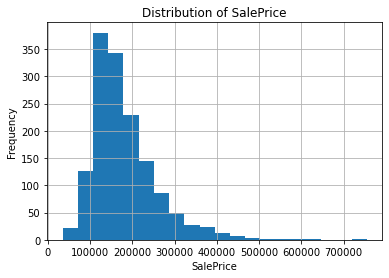

In [33]:
# Your code here
df1['SalePrice'].hist(bins=20)

# add labels and title
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show();


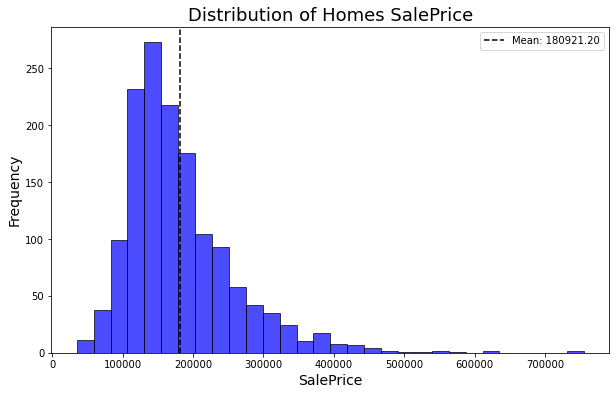

In [34]:
import matplotlib.pyplot as plt

# Calculate the mean of SalePrice
mean_saleprice = df1['SalePrice'].mean()

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['SalePrice'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(mean_saleprice, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_saleprice:.2f}')

# Customizing 
plt.title('Distribution of Homes SalePrice', fontsize=18)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

plt.show()

Now, print out the mean, median, and standard deviation:

In [35]:
# Your code here
mean_saleprice = df1['SalePrice'].mean()
median_saleprice = df1['SalePrice'].median()
std_dev_saleprice = df1['SalePrice'].std()

# results
print(f"Mean of SalePrice: {mean_saleprice:.2f}")
print(f"Median of SalePrice: {median_saleprice:.2f}")
print(f"Standard Deviation of SalePrice: {std_dev_saleprice:.2f}")


Mean of SalePrice: 180921.20
Median of SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


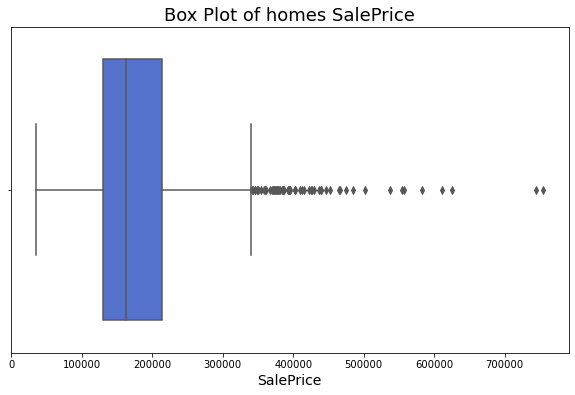

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize skewness and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['SalePrice'], color='royalblue')

plt.title('Box Plot of homes SalePrice', fontsize=18)
plt.xlabel('SalePrice', fontsize=14)

plt.show()

In the cell below, interpret the above information.

### Mean:
- The mean SalePrice is 180,921.20, representing the typical house price in the dataset. It can be influenced by extreme values, such as very high-priced properties.

### Median :
- The median value is 163,000.00, indicating the central price when the sale prices are ordered from lowest to highest. The fact that the median is lower than the mean implies a right-skewed distribution caused by a few expensive houses.

### Standard Deviation :
- The standard deviation is 79,442.50, showing how much house prices typically deviate from the average. This substantial variation reflects a wide range of property values, likely due to differences in factors like location, property size, and other features.


### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

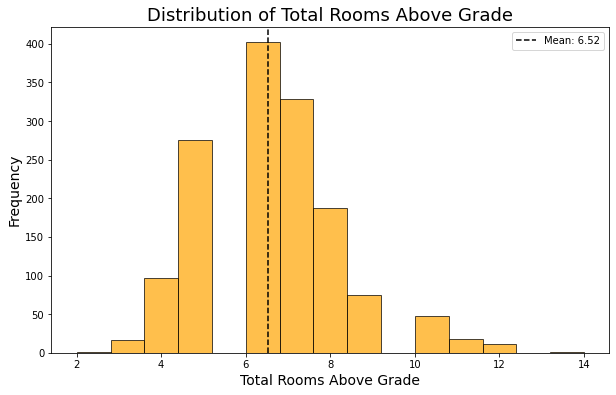

In [37]:
# Your code here
mean_tot_rms = df1['TotRmsAbvGrd'].mean()

# histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['TotRmsAbvGrd'], bins=15, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(mean_tot_rms, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_tot_rms:.2f}')

# Customization
plt.title('Distribution of Total Rooms Above Grade', fontsize=18)
plt.xlabel('Total Rooms Above Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

plt.show()

Now, print out the mean, median, and standard deviation:

In [38]:
# Your code here
mean_tot_rms = df1['TotRmsAbvGrd'].mean()
median_tot_rms = df1['TotRmsAbvGrd'].median()
std_dev_tot_rms = df1['TotRmsAbvGrd'].std()

#results
print(f"Mean of Total Rooms Above Grade: {mean_tot_rms:.2f}")
print(f"Median of Total Rooms Above Grade: {median_tot_rms:.2f}")
print(f"Standard Deviation of Total Rooms Above Grade: {std_dev_tot_rms:.2f}")

Mean of Total Rooms Above Grade: 6.52
Median of Total Rooms Above Grade: 6.00
Standard Deviation of Total Rooms Above Grade: 1.63


In the cell below, interpret the above information.

# Replace None with appropriate text
### Mean :
- The mean value of 6.52 suggests that the typical house in the dataset has around 6.5 rooms above grade. This average is sensitive to extreme values, so houses with significantly more rooms could be pushing the mean higher.

### Median:
- The median of 6.00 indicates that half of the houses have more than 6 rooms above grade, and the other half have fewer. Since the median is slightly lower than the mean, this hints at a distribution with a mild right skew, where a few homes with more rooms are affecting the average.

### Standard Deviation:
- The standard deviation of 1.63 means that the number of rooms above grade typically deviates from the mean by about 1.6 rooms. This suggests there is some variation in room counts across the homes, but the differences aren’t extremely wide.

#### Summary:
- The data shows that most homes have between 5 and 7 rooms above grade. The distribution is fairly consistent, with only a few homes having significantly more rooms, influencing the higher mean. Overall, there is moderate variability in the number of rooms across the dataset.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

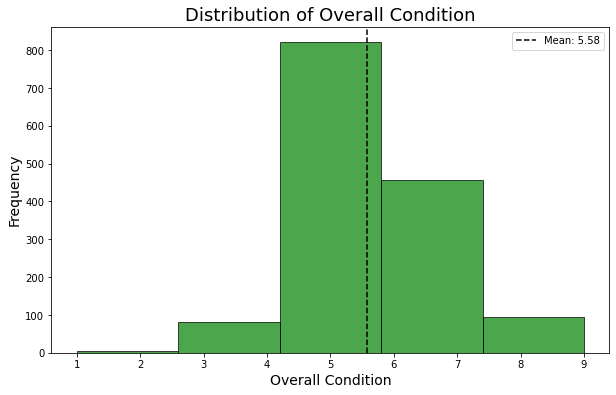

In [39]:
# Your code here
mean_overall_cond = df1['OverallCond'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['OverallCond'], bins=5, color='green', alpha=0.7, edgecolor='black')
plt.axvline(mean_overall_cond, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_overall_cond:.2f}')

# Customizing the plot
plt.title('Distribution of Overall Condition', fontsize=18)
plt.xlabel('Overall Condition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

plt.show()

Now, print out the mean, median, and standard deviation:

In [40]:

# Your code here
mean_overall_cond = df1['OverallCond'].mean()
median_overall_cond = df1['OverallCond'].median()
std_dev_overall_cond = df1['OverallCond'].std()

# Print the results
print(f"Mean of Overall Condition: {mean_overall_cond:.2f}")
print(f"Median of Overall Condition: {median_overall_cond:.2f}")
print(f"Standard Deviation of Overall Condition: {std_dev_overall_cond:.2f}")

Mean of Overall Condition: 5.58
Median of Overall Condition: 5.00
Standard Deviation of Overall Condition: 1.11


In the cell below, interpret the above information.

### Mean :
The mean of 5.58 indicates that, on average, the houses in the dataset are in a moderately good condition. This value can be influenced by homes with notably higher or lower conditions.

### Median:
The median of 5.00 shows that half of the houses have an overall condition rating above 5, and the other half below. Since the median is lower than the mean, this suggests the distribution might be slightly skewed right, with a few homes in better condition raising the mean.

### Standard Deviation :
The standard deviation of 1.11 reveals that the condition ratings tend to deviate from the mean by approximately 1.1 points. This indicates moderate variability in house conditions, with most properties having a condition rating in the 4-7 range.

#### Summary:
Most homes in the dataset are fairly consistent in condition, with a rating around 5. The few homes in better condition are pulling the average higher. Overall, the condition of the houses shows moderate variation, suggesting a relatively balanced quality across the dataset.

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [41]:
# Replace None with appropriate code
below_average_condition = df1[df1['OverallCond'] < 5]
average_condition = df1[df1['OverallCond'] == 5]
above_average_condition = df1[df1['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [42]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

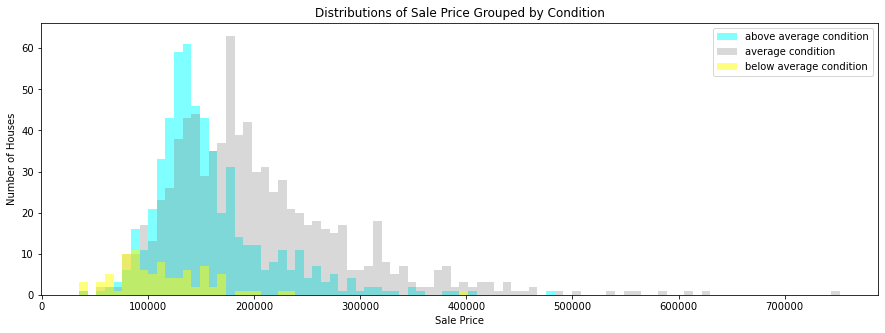

In [45]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df1["SalePrice"].min(), df1["SalePrice"].max(), int(df1["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

#### Above Average Condition : Houses in better condition are generally priced higher, as seen in the histogram for this category, which is skewed toward higher sale prices. This indicates that homes in excellent condition tend to command higher prices.

####  Average Condition : Homes with an overall condition rating of exactly 5 show a more spread-out distribution of sale prices, ranging from lower to higher values. This suggests that homes in average condition can have a wide variety of prices, potentially influenced by other factors like location, size, or unique features.

#### Below Average Condition : Homes in poorer condition have a concentration of lower sale prices, with the histogram skewed toward the lower end of the sale price range. This indicates that homes in below-average condition generally sell for less.

##### There is a clear link between a home’s condition and its sale price. Above average condition homes tend to have higher prices, while below average condition homes typically sell for less.
There’s overlap in the sale prices, especially between the "average" and "above average" categories. This may be surprising, as some above-average condition homes have relatively low sale prices, while some average-condition homes are priced quite high.
The "below average condition" category has a narrower, more concentrated range of sale prices, while both the "above average" and "average" categories show more variation, suggesting that homes in better condition tend to have more variability in pricing.
The "average condition" category has a diverse range of sale prices, indicating that factors beyond just the condition of the house—such as location, size, or additional features—can influence price.
There’s overlap between the "average condition" and "above average condition" categories, where some below-average condition homes actually sell for more than some of the average or better-conditioned homes. This could be due to factors like location or recent renovations.
Overall, the plot reinforces that house condition plays a significant role in determining sale price, but other factors such as location, size, and improvements also have an important influence.










## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [127]:
# Your code here
correlation_matrix = df1.corr()

#  most positively 
correlation_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')
most_positive_corr_column = correlation_with_saleprice.idxmax()
most_positive_corr_value = correlation_with_saleprice.max()

# Print the most_positive
most_positive_corr_column, most_positive_corr_value

('OverallQual', 0.7909816005838047)

Now, find the ***most negatively correlated*** column:

In [128]:
# Your code here
correlation_matrix = df1.corr()

#  most positively 
correlation_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')
most_negative_corr_column = correlation_with_saleprice.idxmin()
most_negative_corr_value = correlation_with_saleprice.min()

# Print the most_negative
most_negative_corr_column, most_negative_corr_value

('KitchenAbvGr', -0.1359073708421417)

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

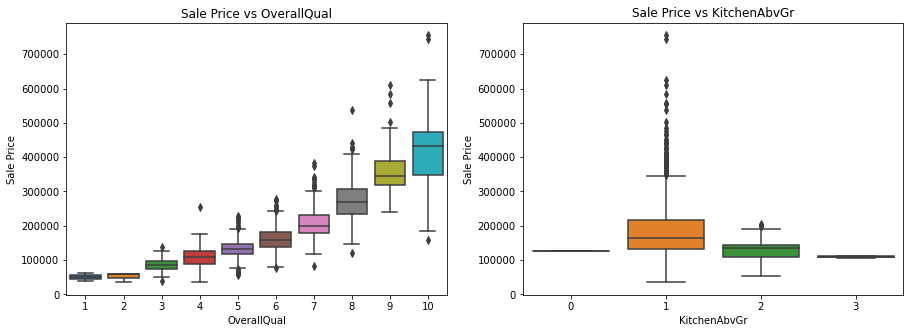

In [130]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
positive_corr_column = 'OverallQual'  
negative_corr_column = 'KitchenAbvGr' 

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df1[positive_corr_column],
    y=df1["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
     x=df1[negative_corr_column],
    y=df1["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Sale Price vs {positive_corr_column}")
ax1.set_xlabel(positive_corr_column)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Sale Price vs {negative_corr_column}")
ax2.set_xlabel(negative_corr_column)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

- OverallQual has a strong positive correlation with SalePrice (0.790), indicating that houses with better overall quality tend to have higher sale prices.  The plot shows a clear upward trend in sale prices as the overall quality of the house increases.

- KitchenAbvGr (the number of kitchens above ground) has a very weak negative correlation with SalePrice (-0.135), indicating that houses with more kitchens above ground tend to have slightly lower sale prices. the presence of multiple kitchens doesn't significantly increase the sale price, possibly because buyers may not see a greater value in additional kitchens, or the layout may be seen as non-ideal.
- The overall quality of a house is clearly a more important determinant of its sale price, with higher overall quality correlating with significantly higher sale prices.
- The number of kitchens above ground shows a weak negative correlation with sale price, implying that more kitchens may not lead to higher prices and could be indicative of non-traditional house layouts that buyers might not find as appealing.


## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [93]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

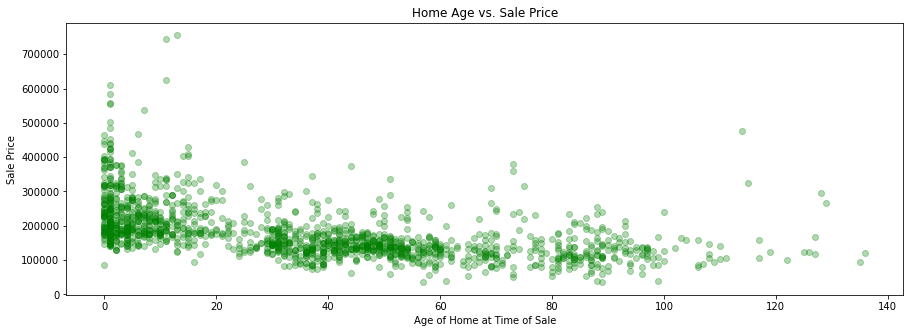

In [94]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

- From the scatter plot, you may notice that newer homes tend to have higher sale prices, but this is not a strict rule. There seems to be a general trend where homes built more recently are sold at higher prices, likely because they have more modern amenities, better construction, and fewer maintenance issues.
- Older homes (homes with a higher "Age" value) tend to have a wider range of sale prices, with some still commanding high prices despite their age. This could be due to renovations, historic value, or location factors.
- There may also be instances where older homes are priced lower because they require more maintenance or renovations, which could bring their sale price down.

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.